In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 30)

In [2]:
# Get footywire match data with a row for each player
df_footywire_data = pd.read_csv(r'inputs/footywire_player_matches.csv', index_col=0)
df_footywire_data = df_footywire_data.drop_duplicates()
df_footywire_data

,Date,Season,Round,Venue,Player,Team,Opposition,Status,Match_id,CP,UP,ED,DE,CM,GA,MI5,One.Percenters,BO,TOG,K,HB,D,M,G,B,T,HO,GA1,I50,CL,CG,R50,FF,FA,AF,SC,CCL,SCL,SI,MG,TO,ITC,T5
1,2010-03-25,2010,Round 1,MCG,Daniel Connors,Richmond,Carlton,Home,5089,8,15,16,66.7,0,0,0,1,0,69,14,10,24,3,0,0,1,0,0,2,2,4,6,2,0,77,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-03-25,2010,Round 1,MCG,Daniel Jackson,Richmond,Carlton,Home,5089,11,10,14,60.9,1,0,0,0,0,80,11,12,23,2,0,0,5,0,0,8,5,4,1,2,0,85,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-03-25,2010,Round 1,MCG,Brett Deledio,Richmond,Carlton,Home,5089,7,14,16,76.2,0,0,0,0,0,89,12,9,21,5,1,0,6,0,0,4,3,4,3,1,2,94,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-03-25,2010,Round 1,MCG,Ben Cousins,Richmond,Carlton,Home,5089,9,10,11,57.9,0,1,0,0,0,69,13,6,19,1,1,0,1,0,1,1,2,3,4,1,0,65,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2010-03-25,2010,Round 1,MCG,Trent Cotchin,Richmond,Carlton,Home,5089,8,10,13,68.4,1,0,0,0,1,77,11,8,19,6,0,0,1,0,0,2,3,3,2,0,2,65,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90416,2019-09-28,2019,Grand Final,MCG,Harrison Himmelberg,GWS,Richmond,Away,9927,3,9,7,58.3,1,0,2,4,0,92,9,3,12,7,1,1,1,2,0,2,0,3,0,1,1,65,51,0.0,0.0,3.0,153.0,4.0,2.0,1.0
90417,2019-09-28,2019,Grand Final,MCG,Samuel Reid,GWS,Richmond,Away,9927,5,6,8,66.7,0,0,0,4,0,96,5,7,12,2,0,0,3,0,0,0,1,2,1,0,0,47,55,0.0,1.0,1.0,97.0,2.0,5.0,0.0
90418,2019-09-28,2019,Grand Final,MCG,Adam Kennedy,GWS,Richmond,Away,9927,4,8,9,81.8,0,0,0,1,0,71,5,6,11,4,0,0,4,0,0,2,1,0,0,1,0,56,55,0.0,1.0,1.0,121.0,0.0,5.0,1.0
90419,2019-09-28,2019,Grand Final,MCG,Shane Mumford,GWS,Richmond,Away,9927,8,2,7,70.0,0,0,0,4,0,75,2,8,10,0,0,0,1,15,0,1,2,2,1,1,0,42,62,1.0,1.0,0.0,0.0,1.0,2.0,0.0


In [3]:
# Create a summary to get the total SC and AF points for each match
df_match_summary = pd.pivot_table(df_footywire_data, index=['Match_id'], values=['SC', 'AF'], columns=['Status'], aggfunc=np.sum)
df_match_summary = df_match_summary.reset_index()
df_match_summary.columns = df_match_summary.columns.to_series().str.join('_')
df_match_summary = df_match_summary.rename(columns={'Match_id_': 'Match_id'})
df_match_summary

,Match_id,AF_Away,AF_Home,SC_Away,SC_Home
0,4961,1411,1610,1656,1661
1,4962,1393,1713,1359,1944
2,4963,1452,1900,1332,1973
3,4964,1699,1364,1776,1534
4,4965,1643,1503,1742,1556
...,...,...,...,...,...
2032,9923,1363,1544,1495,1802
2033,9924,1338,1415,1622,1678
2034,9925,1492,1385,1680,1616
2035,9926,1518,1580,1657,1641


In [4]:
# get footywire match data with a single row for each match
df_footywire_matches = pd.read_csv(r'Inputs/footywire_team_matches.csv', index_col=0)
df_footywire_matches['away_team'] = df_footywire_matches['away_team'].str.strip()
df_footywire_matches

,year,date,venue,crowd,match_id,home_team,away_team,home_team_score,away_team_score
0,2010,Thu 25 Mar 7:10pm,MCG,72010,5089,Richmond,Carlton,64,120
1,2010,Fri 26 Mar 7:40pm,MCG,57772,5090,Geelong,Essendon,125,94
2,2010,Sat 27 Mar 2:10pm,MCG,45615,5091,Melbourne,Hawthorn,61,117
3,2010,Sat 27 Mar 7:10pm,ANZ Stadium,31330,5093,Sydney,St Kilda,88,96
4,2010,Sat 27 Mar 7:30pm,Gabba,29201,5092,Brisbane,West Coast,114,82
...,...,...,...,...,...,...,...,...,...
202,2019,Fri 13 Sep 7:50pm,MCG,51813,9923,Geelong,West Coast,88,68
203,2019,Sat 14 Sep 7:25pm,Gabba,30034,9924,Brisbane,GWS,80,83
204,2019,Fri 20 Sep 7:50pm,MCG,94423,9925,Richmond,Geelong,85,66
205,2019,Sat 21 Sep 4:35pm,MCG,77828,9926,Collingwood,GWS,52,56


In [5]:
# Merge the fantasy summary and the match scores
df_match_fantasy_summary = pd.merge(df_footywire_matches, df_match_summary,how='left', left_on='match_id', right_on='Match_id')
# Drop bye and cancelled games
df_match_fantasy_summary = df_match_fantasy_summary.drop(df_match_fantasy_summary.loc[df_match_fantasy_summary['venue'] == "BYE"].index)
df_match_fantasy_summary = df_match_fantasy_summary.drop(df_match_fantasy_summary.loc[df_match_fantasy_summary['venue'] == "MATCH CANCELLED"].index)
df_match_fantasy_summary

,year,date,venue,crowd,match_id,home_team,away_team,home_team_score,away_team_score,Match_id,AF_Away,AF_Home,SC_Away,SC_Home
0,2010,Thu 25 Mar 7:10pm,MCG,72010,5089,Richmond,Carlton,64,120,5089,1938,1250,1986,1321
1,2010,Fri 26 Mar 7:40pm,MCG,57772,5090,Geelong,Essendon,125,94,5090,1503,1774,1523,1775
2,2010,Sat 27 Mar 2:10pm,MCG,45615,5091,Melbourne,Hawthorn,61,117,5091,1863,1516,1829,1470
3,2010,Sat 27 Mar 7:10pm,ANZ Stadium,31330,5093,Sydney,St Kilda,88,96,5093,1490,1532,1637,1661
4,2010,Sat 27 Mar 7:30pm,Gabba,29201,5092,Brisbane,West Coast,114,82,5092,1543,1607,1609,1691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,2019,Fri 13 Sep 7:50pm,MCG,51813,9923,Geelong,West Coast,88,68,9923,1363,1544,1495,1802
2033,2019,Sat 14 Sep 7:25pm,Gabba,30034,9924,Brisbane,GWS,80,83,9924,1338,1415,1622,1678
2034,2019,Fri 20 Sep 7:50pm,MCG,94423,9925,Richmond,Geelong,85,66,9925,1492,1385,1680,1616
2035,2019,Sat 21 Sep 4:35pm,MCG,77828,9926,Collingwood,GWS,52,56,9926,1518,1580,1657,1641


In [6]:
# Calculate the match result, the SC result, and the AF result
def get_match_result(home_score, away_score):
    result = ""
    if home_score > away_score:
        result = "home_win"
    elif home_score < away_score:
        result = "away_win"
    elif home_score == away_score:
        result = "tie"
    return result

df_match_fantasy_summary['match_result'] = df_match_fantasy_summary.apply(lambda row: get_match_result(row['home_team_score'], row['away_team_score']), axis=1)
df_match_fantasy_summary['match_result_home_margin'] = df_match_fantasy_summary['home_team_score'] - df_match_fantasy_summary['away_team_score']
df_match_fantasy_summary['match_result_away_margin'] = df_match_fantasy_summary['away_team_score'] - df_match_fantasy_summary['home_team_score']
df_match_fantasy_summary['sc_result'] = df_match_fantasy_summary.apply(lambda row: get_match_result(row['SC_Home'], row['SC_Away']), axis=1)
df_match_fantasy_summary['sc_correct?'] = df_match_fantasy_summary.apply(lambda row: row['sc_result'] == row['match_result'], axis=1)
df_match_fantasy_summary['af_result'] = df_match_fantasy_summary.apply(lambda row: get_match_result(row['AF_Home'], row['AF_Away']), axis=1)
df_match_fantasy_summary['af_correct?'] = df_match_fantasy_summary.apply(lambda row: row['af_result'] == row['match_result'], axis=1)
df_match_fantasy_summary['diff_fantasy_result'] = df_match_fantasy_summary.apply(lambda row: row['sc_result'] != row['af_result'], axis=1)
df_match_fantasy_summary.iloc[1627::]

,year,date,venue,crowd,match_id,home_team,away_team,home_team_score,away_team_score,Match_id,AF_Away,AF_Home,SC_Away,SC_Home,match_result,match_result_home_margin,match_result_away_margin,sc_result,sc_correct?,af_result,af_correct?,diff_fantasy_result
1627,2018,Sat 24 Mar 6:25pm,Cazaly's Stadium,3722,9518,Gold Coast,North Melbourne,55,39,9518,1358,1714,1518,1782,home_win,16,-16,home_win,True,home_win,True,False
1628,2018,Sat 24 Mar 7:25pm,MCG,58051,9519,Hawthorn,Collingwood,101,67,9519,1503,1600,1533,1770,home_win,34,-34,home_win,True,home_win,True,False
1629,2018,Sun 25 Mar 1:10pm,Canberra Oval,10454,9520,GWS,Western Bulldogs,133,51,9520,1396,1843,1356,1943,home_win,82,-82,home_win,True,home_win,True,False
1630,2018,Sun 25 Mar 3:20pm,MCG,54112,9521,Melbourne,Geelong,94,97,9521,1610,1463,1699,1601,away_win,-3,3,away_win,True,away_win,True,False
1631,2018,Sun 25 Mar 4:20pm,Optus Stadium,53553,9522,West Coast,Sydney,86,115,9522,1596,1502,1766,1536,away_win,-29,29,away_win,True,away_win,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,2019,Fri 13 Sep 7:50pm,MCG,51813,9923,Geelong,West Coast,88,68,9923,1363,1544,1495,1802,home_win,20,-20,home_win,True,home_win,True,False
2033,2019,Sat 14 Sep 7:25pm,Gabba,30034,9924,Brisbane,GWS,80,83,9924,1338,1415,1622,1678,away_win,-3,3,home_win,False,home_win,False,False
2034,2019,Fri 20 Sep 7:50pm,MCG,94423,9925,Richmond,Geelong,85,66,9925,1492,1385,1680,1616,home_win,19,-19,away_win,False,away_win,False,False
2035,2019,Sat 21 Sep 4:35pm,MCG,77828,9926,Collingwood,GWS,52,56,9926,1518,1580,1657,1641,away_win,-4,4,away_win,True,home_win,False,True


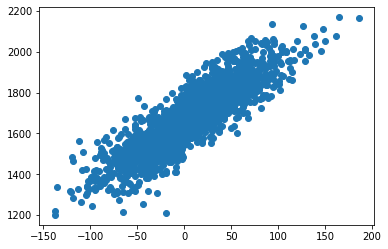

In [7]:
# Home team results
plt.scatter(df_match_fantasy_summary['match_result_home_margin'], df_match_fantasy_summary['SC_Home'])
plt.show()

In [8]:
sc_series = df_match_fantasy_summary['sc_correct?'].value_counts()
af_series = df_match_fantasy_summary['af_correct?'].value_counts()
data_dict = {
    'sc_correct?': sc_series,
    'af_correct?': af_series
}
df_fantasy_accuracy = pd.DataFrame(data_dict).transpose()
df_fantasy_accuracy['Total'] = df_fantasy_accuracy[True] + df_fantasy_accuracy[False] 
df_fantasy_accuracy['% Correct'] = round((df_fantasy_accuracy[True] / df_fantasy_accuracy['Total']) * 100, 2)
df_fantasy_accuracy

,True,False,Total,% Correct
sc_correct?,1783,254,2037,87.53
af_correct?,1607,430,2037,78.89


### Supercoach is the most accurate measure of indicating wins

In [9]:
from sklearn import linear_model
from sklearn import model_selection

X = df_match_fantasy_summary['SC_Home']
X = np.array(X).reshape(-1, 1)
y = df_match_fantasy_summary['match_result_home_margin']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.30)

clr = linear_model.LinearRegression()

cv_result = model_selection.cross_val_score(estimator=clr
                                , X=X_train
                                , y=y_train
                                , cv=50
                                , scoring="neg_mean_squared_error"
                                )

cv_result.mean()

-474.2511977733868

In [10]:
from sklearn import metrics

clr.fit(X_train, y_train)
pred = clr.predict(X_test)
sc_mse = metrics.mean_squared_error(pred, y_test)

In [11]:
from sklearn import linear_model
from sklearn import model_selection

X = df_match_fantasy_summary['AF_Home']
X = np.array(X).reshape(-1, 1)
y = df_match_fantasy_summary['match_result_home_margin']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.30)

clr = linear_model.LinearRegression()

cv_result = model_selection.cross_val_score(estimator=clr
                                , X=X_train
                                , y=y_train
                                , cv=50
                                , scoring="neg_mean_squared_error"
                                )

cv_result.mean()

-1084.1331670499358

In [12]:
from sklearn import metrics

clr.fit(X_train, y_train)
pred = clr.predict(X_test)
af_mse = metrics.mean_squared_error(pred, y_test)

In [13]:
{
    "Supercoach Mean Squared Error": round(sc_mse, 1),
    "AFL Fantasy Mean Squared Error": round(af_mse, 1)
}

{'Supercoach Mean Squared Error': 502.4,
 'AFL Fantasy Mean Squared Error': 1097.5}

### Supercoach score is a more reliable indicator of the winning/losing margin

### Supercoach Player Projections

In [14]:
df_footywire_data

,Date,Season,Round,Venue,Player,Team,Opposition,Status,Match_id,CP,UP,ED,DE,CM,GA,MI5,One.Percenters,BO,TOG,K,HB,D,M,G,B,T,HO,GA1,I50,CL,CG,R50,FF,FA,AF,SC,CCL,SCL,SI,MG,TO,ITC,T5
1,2010-03-25,2010,Round 1,MCG,Daniel Connors,Richmond,Carlton,Home,5089,8,15,16,66.7,0,0,0,1,0,69,14,10,24,3,0,0,1,0,0,2,2,4,6,2,0,77,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-03-25,2010,Round 1,MCG,Daniel Jackson,Richmond,Carlton,Home,5089,11,10,14,60.9,1,0,0,0,0,80,11,12,23,2,0,0,5,0,0,8,5,4,1,2,0,85,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-03-25,2010,Round 1,MCG,Brett Deledio,Richmond,Carlton,Home,5089,7,14,16,76.2,0,0,0,0,0,89,12,9,21,5,1,0,6,0,0,4,3,4,3,1,2,94,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-03-25,2010,Round 1,MCG,Ben Cousins,Richmond,Carlton,Home,5089,9,10,11,57.9,0,1,0,0,0,69,13,6,19,1,1,0,1,0,1,1,2,3,4,1,0,65,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2010-03-25,2010,Round 1,MCG,Trent Cotchin,Richmond,Carlton,Home,5089,8,10,13,68.4,1,0,0,0,1,77,11,8,19,6,0,0,1,0,0,2,3,3,2,0,2,65,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90416,2019-09-28,2019,Grand Final,MCG,Harrison Himmelberg,GWS,Richmond,Away,9927,3,9,7,58.3,1,0,2,4,0,92,9,3,12,7,1,1,1,2,0,2,0,3,0,1,1,65,51,0.0,0.0,3.0,153.0,4.0,2.0,1.0
90417,2019-09-28,2019,Grand Final,MCG,Samuel Reid,GWS,Richmond,Away,9927,5,6,8,66.7,0,0,0,4,0,96,5,7,12,2,0,0,3,0,0,0,1,2,1,0,0,47,55,0.0,1.0,1.0,97.0,2.0,5.0,0.0
90418,2019-09-28,2019,Grand Final,MCG,Adam Kennedy,GWS,Richmond,Away,9927,4,8,9,81.8,0,0,0,1,0,71,5,6,11,4,0,0,4,0,0,2,1,0,0,1,0,56,55,0.0,1.0,1.0,121.0,0.0,5.0,1.0
90419,2019-09-28,2019,Grand Final,MCG,Shane Mumford,GWS,Richmond,Away,9927,8,2,7,70.0,0,0,0,4,0,75,2,8,10,0,0,0,1,15,0,1,2,2,1,1,0,42,62,1.0,1.0,0.0,0.0,1.0,2.0,0.0


In [16]:
# Get rolling averages
def rolling_average(df, window):
    return df.rolling(min_periods=1, window=window).mean().shift(1)

rolling_stat_list = ['CP', 'UP', 'ED', 'DE', 'CM', 'GA', 'MI5', 'One.Percenters', 'BO', 'TOG', 'K', 'HB', 'D', 'M', 'G', 'B', 'T', 'HO', 'GA1', 'I50', 'CL', 'CG', 'R50', 'FF', 'FA']

for stat in rolling_stat_list:
    df_footywire_data["3_rd_rolling_{}".format(stat)] = df_footywire_data.groupby('Player')[stat].apply(lambda player: rolling_average(player, 3))

df_footywire_data['rolling 5 round average'] = df_footywire_data.groupby('Player')['SC'].apply(lambda player: rolling_average(player, 5))
df_footywire_data['rolling 3 round average'] = df_footywire_data.groupby('Player')['SC'].apply(lambda player: rolling_average(player, 3))
df_footywire_data['previous sc score'] = df_footywire_data.groupby('Player')['SC'].apply(lambda player: rolling_average(player, 1))
df_footywire_data
df_footywire_data.loc[df_footywire_data['Player'] == 'Patrick Cripps', :]

,Date,Season,Round,Venue,Player,Team,Opposition,Status,Match_id,CP,UP,ED,DE,CM,GA,MI5,One.Percenters,BO,TOG,K,HB,D,M,G,B,T,HO,GA1,I50,CL,CG,R50,FF,FA,AF,SC,CCL,SCL,SI,MG,TO,ITC,T5,rolling 5 round average,rolling 3 round average,previous sc score,3_rd_rolling_CP,3_rd_rolling_UP,3_rd_rolling_ED,3_rd_rolling_DE,3_rd_rolling_CM,3_rd_rolling_GA,3_rd_rolling_MI5,3_rd_rolling_One.Percenters,3_rd_rolling_BO,3_rd_rolling_TOG,3_rd_rolling_K,3_rd_rolling_HB,3_rd_rolling_D,3_rd_rolling_M,3_rd_rolling_G,3_rd_rolling_B,3_rd_rolling_T,3_rd_rolling_HO,3_rd_rolling_GA1,3_rd_rolling_I50,3_rd_rolling_CL,3_rd_rolling_CG,3_rd_rolling_R50,3_rd_rolling_FF,3_rd_rolling_FA
36267,2014-04-12,2014,Round 4,MCG,Patrick Cripps,Carlton,Melbourne,Home,5785,8,10,11,64.7,0,0,0,5,4,81,5,12,17,3,0,1,5,0,0,2,1,3,1,1,3,61,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36958,2014-04-20,2014,Round 5,Etihad Stadium,Patrick Cripps,Carlton,Western Bulldogs,Away,5800,5,2,2,28.6,0,0,0,1,0,56,4,3,7,1,0,0,1,0,0,1,0,1,0,1,0,26,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.000000,74.000000,74.0,8.000000,10.000000,11.000000,64.700000,0.000000,0.000000,0.0,5.000000,4.000000,81.000000,5.000000,12.000000,17.000000,3.000000,0.000000,1.000000,5.000000,0.000000,0.000000,2.000000,1.000000,3.000000,1.000000,1.000000,3.000000
43406,2014-08-30,2014,Round 23,MCG,Patrick Cripps,Carlton,Essendon,Home,5947,0,3,2,66.7,0,0,0,0,0,18,1,2,3,1,0,0,3,0,0,0,0,0,1,0,0,22,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.500000,47.500000,21.0,6.500000,6.000000,6.500000,46.650000,0.000000,0.000000,0.0,3.000000,2.000000,68.500000,4.500000,7.500000,12.000000,2.000000,0.000000,0.500000,3.000000,0.000000,0.000000,1.500000,0.500000,2.000000,0.500000,1.000000,1.500000
44145,2015-04-02,2015,Round 1,MCG,Patrick Cripps,Carlton,Richmond,Home,5964,5,9,9,64.3,1,0,0,0,0,76,4,10,14,3,0,0,3,1,0,1,1,0,2,0,0,54,53,0.0,1.0,2.0,16.0,3.0,1.0,0.0,39.333333,39.333333,23.0,4.333333,5.000000,5.000000,53.333333,0.000000,0.000000,0.0,2.000000,1.333333,51.666667,3.333333,5.666667,9.000000,1.666667,0.000000,0.333333,3.000000,0.000000,0.000000,1.000000,0.333333,1.333333,0.666667,0.666667,1.000000
44972,2015-04-18,2015,Round 3,MCG,Patrick Cripps,Carlton,Essendon,Home,5983,15,7,11,50.0,1,0,0,1,0,75,10,12,22,2,0,2,4,2,0,6,5,2,0,1,0,81,89,2.0,3.0,8.0,278.0,5.0,4.0,1.0,42.750000,32.333333,53.0,3.333333,4.666667,4.333333,53.200000,0.333333,0.000000,0.0,0.333333,0.000000,50.000000,3.000000,5.000000,8.000000,1.666667,0.000000,0.000000,2.333333,0.333333,0.000000,0.666667,0.333333,0.333333,1.000000,0.333333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88133,2019-07-27,2019,Round 19,MCG,Patrick Cripps,Carlton,Adelaide,Home,9876,24,15,26,66.7,0,1,0,0,0,89,16,23,39,4,1,0,7,0,1,8,19,4,2,4,1,141,152,8.0,11.0,8.0,342.0,6.0,1.0,1.0,109.800000,88.666667,73.0,13.666667,9.666667,16.666667,75.933333,0.000000,0.000000,0.0,1.666667,1.000000,87.666667,6.333333,16.333333,22.666667,1.666667,0.333333,0.666667,5.000000,0.000000,0.000000,3.000000,6.666667,4.333333,0.000000,1.666667,3.000000
88752,2019-08-04,2019,Round 20,Marvel Stadium,Patrick Cripps,Carlton,West Coast,Home,9890,14,11,15,62.5,0,0,0,2,0,88,8,16,24,3,0,0,3,0,0,2,9,6,0,1,1,75,78,3.0,6.0,2.0,210.0,6.0,0.0,1.0,122.400000,113.333333,152.0,18.000000,11.000000,20.000000,73.933333,0.000000,0.333333,0.0,1.333333,0.666667,88.000000,9.666667,18.666667,28.333333,2.333333,0.666667,0.666667,6.333333,0.000000,0.333333,4.333333,10.666667,4.666667,0.666667,2.333333,3.000000
89167,2019-08-11,2019,Round 21,MCG,Patrick Cripps,Carlton,Richmond,Away,9899,21,15,20,54.1,1,0,0,2,0,92,15,22,37,2,0,0,7,0,0,3,4,2,2,3,0,126,134,0.0,4.0,1.0,343.0,5.0,8.0,0.0,99.200000,101.000000,78.0,16.333333,11.000000,19.3

In [17]:
# Get home/away status
status_dummies = pd.get_dummies(df_footywire_data['Status'], prefix='Status')
df_footywire_data = df_footywire_data.merge(status_dummies, left_index=True, right_index=True)
df_footywire_data

,Date,Season,Round,Venue,Player,Team,Opposition,Status,Match_id,CP,UP,ED,DE,CM,GA,MI5,One.Percenters,BO,TOG,K,HB,D,M,G,B,T,HO,GA1,I50,CL,CG,R50,FF,FA,AF,SC,CCL,SCL,SI,MG,TO,ITC,T5,rolling 5 round average,rolling 3 round average,previous sc score,3_rd_rolling_CP,3_rd_rolling_UP,3_rd_rolling_ED,3_rd_rolling_DE,3_rd_rolling_CM,3_rd_rolling_GA,3_rd_rolling_MI5,3_rd_rolling_One.Percenters,3_rd_rolling_BO,3_rd_rolling_TOG,3_rd_rolling_K,3_rd_rolling_HB,3_rd_rolling_D,3_rd_rolling_M,3_rd_rolling_G,3_rd_rolling_B,3_rd_rolling_T,3_rd_rolling_HO,3_rd_rolling_GA1,3_rd_rolling_I50,3_rd_rolling_CL,3_rd_rolling_CG,3_rd_rolling_R50,3_rd_rolling_FF,3_rd_rolling_FA,Status_Away,Status_Home
1,2010-03-25,2010,Round 1,MCG,Daniel Connors,Richmond,Carlton,Home,5089,8,15,16,66.7,0,0,0,1,0,69,14,10,24,3,0,0,1,0,0,2,2,4,6,2,0,77,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
2,2010-03-25,2010,Round 1,MCG,Daniel Jackson,Richmond,Carlton,Home,5089,11,10,14,60.9,1,0,0,0,0,80,11,12,23,2,0,0,5,0,0,8,5,4,1,2,0,85,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
3,2010-03-25,2010,Round 1,MCG,Brett Deledio,Richmond,Carlton,Home,5089,7,14,16,76.2,0,0,0,0,0,89,12,9,21,5,1,0,6,0,0,4,3,4,3,1,2,94,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
4,2010-03-25,2010,Round 1,MCG,Ben Cousins,Richmond,Carlton,Home,5089,9,10,11,57.9,0,1,0,0,0,69,13,6,19,1,1,0,1,0,1,1,2,3,4,1,0,65,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
5,2010-03-25,2010,Round 1,MCG,Trent Cotchin,Richmond,Carlton,Home,5089,8,10,13,68.4,1,0,0,0,1,77,11,8,19,6,0,0,1,0,0,2,3,3,2,0,2,65,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90416,2019-09-28,2019,Grand Final,MCG,Harrison Himmelberg,GWS,Richmond,Away,9927,3,9,7,58.3,1,0,2,4,0,92,9,3,12,7,1,1,1,2,0,2,0,3,0,1,1,65,51,0.0,0.0,3.0,153.0,4.0,2.0,1.0,55.2,57.666667,58.0,6.333333,3.666667,7.666667,85.500000,0.000000,0.333333,0.666667,3.000000,0.000000,84.333333,3.666667,5.333333,9.000000,1.333333,0.666667,0.333333,2.333333,0.333333,0.333333,1.333333,0.666667,1.000000,0.000000,1.000000,0.666667,1,0
90417,2019-09-28,2019,Grand Final,MCG,Samuel Reid,GWS,Richmond,Away,9927,5,6,8,66.7,0,0,0,4,0,96,5,7,12,2,0,0,3,0,0,0,1,2,1,0,0,47,55,0.0,1.0,1.0,97.0,2.0,5.0,0.0,44.8,45.000000,55.0,4.000000,6.666667,8.666667,82.066667,0.000000,0.000000,0.333333,2.000000,0.000000,86.000000,5.333333,5.333333,10.666667,1.333333,0.000000,0.333333,3.000000,0.000000,0.000000,1.666667,1.333333,2.000000,0.000000,0.333333,1.333333,1,0
90418,2019-09-28,2019,Grand Final,MCG,Adam Kennedy,GWS,Richmond,Away,9927,4,8,9,81.8,0,0,0,1,0,71,5,6,11,4,0,0,4,0,0,2,1,0,0,1,0,56,55,0.0,1.0,1.0,121.0,0.0,5.0,1.0,62.8,54.000000,53.0,3.333333,11.333333,9.000000,62.133333,0.000000,0.000000,0.000000,2.000000,0.000000,78.333333,10.666667,3.666667,14.333333,3.666667,0.000000,0.333333,3.333333,0.000000,0.000000,2.000000,0.666667,2.000000,3.333333,0.333333,1.000000,1,0
90419,2019-09-28,2019,Grand Final,MCG,Shane Mumford,GWS,Richmond,Away,9927,8,2,7,70.0,0,0,0,4,0,75,2,8,10,0,0,0,1,15,0,1,2,2,1,1,0,42,62,1.0,1.0,0.0,0.0,1.0,2.0,0.0,72.8,70.666667,53.0,7.000000,3.000000,5.000000,56.966667,0.666667,0.333333,0.000000,2.666667,0.000000,84.666667,3.666667,5.000000,8.666667,0.666667,0.000000,0.000000,7.000000,26.000000,0.333333,1.333333,

In [18]:
df_footywire_data['opposition_match_identifier'] = df_footywire_data['Match_id'].astype(str) + '_' + df_footywire_data['Opposition']
df_footywire_data

,Date,Season,Round,Venue,Player,Team,Opposition,Status,Match_id,CP,UP,ED,DE,CM,GA,MI5,One.Percenters,BO,TOG,K,HB,D,M,G,B,T,HO,GA1,I50,CL,CG,R50,FF,FA,AF,SC,CCL,SCL,SI,MG,TO,ITC,T5,rolling 5 round average,rolling 3 round average,previous sc score,3_rd_rolling_CP,3_rd_rolling_UP,3_rd_rolling_ED,3_rd_rolling_DE,3_rd_rolling_CM,3_rd_rolling_GA,3_rd_rolling_MI5,3_rd_rolling_One.Percenters,3_rd_rolling_BO,3_rd_rolling_TOG,3_rd_rolling_K,3_rd_rolling_HB,3_rd_rolling_D,3_rd_rolling_M,3_rd_rolling_G,3_rd_rolling_B,3_rd_rolling_T,3_rd_rolling_HO,3_rd_rolling_GA1,3_rd_rolling_I50,3_rd_rolling_CL,3_rd_rolling_CG,3_rd_rolling_R50,3_rd_rolling_FF,3_rd_rolling_FA,Status_Away,Status_Home,opposition_match_identifier
1,2010-03-25,2010,Round 1,MCG,Daniel Connors,Richmond,Carlton,Home,5089,8,15,16,66.7,0,0,0,1,0,69,14,10,24,3,0,0,1,0,0,2,2,4,6,2,0,77,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,5089_Carlton
2,2010-03-25,2010,Round 1,MCG,Daniel Jackson,Richmond,Carlton,Home,5089,11,10,14,60.9,1,0,0,0,0,80,11,12,23,2,0,0,5,0,0,8,5,4,1,2,0,85,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,5089_Carlton
3,2010-03-25,2010,Round 1,MCG,Brett Deledio,Richmond,Carlton,Home,5089,7,14,16,76.2,0,0,0,0,0,89,12,9,21,5,1,0,6,0,0,4,3,4,3,1,2,94,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,5089_Carlton
4,2010-03-25,2010,Round 1,MCG,Ben Cousins,Richmond,Carlton,Home,5089,9,10,11,57.9,0,1,0,0,0,69,13,6,19,1,1,0,1,0,1,1,2,3,4,1,0,65,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,5089_Carlton
5,2010-03-25,2010,Round 1,MCG,Trent Cotchin,Richmond,Carlton,Home,5089,8,10,13,68.4,1,0,0,0,1,77,11,8,19,6,0,0,1,0,0,2,3,3,2,0,2,65,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,5089_Carlton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90416,2019-09-28,2019,Grand Final,MCG,Harrison Himmelberg,GWS,Richmond,Away,9927,3,9,7,58.3,1,0,2,4,0,92,9,3,12,7,1,1,1,2,0,2,0,3,0,1,1,65,51,0.0,0.0,3.0,153.0,4.0,2.0,1.0,55.2,57.666667,58.0,6.333333,3.666667,7.666667,85.500000,0.000000,0.333333,0.666667,3.000000,0.000000,84.333333,3.666667,5.333333,9.000000,1.333333,0.666667,0.333333,2.333333,0.333333,0.333333,1.333333,0.666667,1.000000,0.000000,1.000000,0.666667,1,0,9927_Richmond
90417,2019-09-28,2019,Grand Final,MCG,Samuel Reid,GWS,Richmond,Away,9927,5,6,8,66.7,0,0,0,4,0,96,5,7,12,2,0,0,3,0,0,0,1,2,1,0,0,47,55,0.0,1.0,1.0,97.0,2.0,5.0,0.0,44.8,45.000000,55.0,4.000000,6.666667,8.666667,82.066667,0.000000,0.000000,0.333333,2.000000,0.000000,86.000000,5.333333,5.333333,10.666667,1.333333,0.000000,0.333333,3.000000,0.000000,0.000000,1.666667,1.333333,2.000000,0.000000,0.333333,1.333333,1,0,9927_Richmond
90418,2019-09-28,2019,Grand Final,MCG,Adam Kennedy,GWS,Richmond,Away,9927,4,8,9,81.8,0,0,0,1,0,71,5,6,11,4,0,0,4,0,0,2,1,0,0,1,0,56,55,0.0,1.0,1.0,121.0,0.0,5.0,1.0,62.8,54.000000,53.0,3.333333,11.333333,9.000000,62.133333,0.000000,0.000000,0.000000,2.000000,0.000000,78.333333,10.666667,3.666667,14.333333,3.666667,0.000000,0.333333,3.333333,0.000000,0.000000,2.000000,0.666667,2.000000,3.333333,0.333333,1.000000,1,0,9927_Richmond
90419,2019-09-28,2019,Grand Final,MCG,Shane Mumford,GWS,Richmond,Away,9927,8,2,7,70.0,0,0,0,4,0,75,2,8,10,0,0,0,1,15,0,1,2,2,1,1,0,42,62,1.0,1.0,0.0,0.0,1.0,2.0,0.0,72.8,70.666667,53.0,7.000000,3.000000,5.000000,56.966667,0.66666

In [19]:
# Get rolling previous team SC scores
renamed_cols = {
    "home_team": "team", 
    "home_team_score": "score",
    "AF_Home": "AF", 
    "SC_Home": "SC", 
    "match_result_home_margin": "margin", 
    "away_team": "team", 
    "away_team_score": "score", 
    "AF_Away": "AF", 
    "SC_Away": "SC", 
    "match_result_away_margin": "margin"
}

home_match_details = df_match_fantasy_summary.loc[:, ['year', 'date', 'venue', 'crowd', 'match_id', 'home_team', 'home_team_score', 'AF_Home', 'SC_Home', 'match_result_home_margin']].rename(columns=renamed_cols)
away_match_details = df_match_fantasy_summary.loc[:, ['year', 'date', 'venue', 'crowd', 'match_id', 'away_team', 'away_team_score', 'AF_Away', 'SC_Away', 'match_result_away_margin']].rename(columns=renamed_cols)
df_matches_by_team = pd.concat([home_match_details, away_match_details]).sort_index().reset_index()
df_matches_by_team['opposition previous SC match score'] =  df_matches_by_team.groupby('team')['SC'].apply(lambda team: rolling_average(team, 1))
df_matches_by_team['opposition rolling 3 round SC match average'] =  df_matches_by_team.groupby('team')['SC'].apply(lambda team: rolling_average(team, 3))
df_matches_by_team['opposition rolling 5 round SC match average'] =  df_matches_by_team.groupby('team')['SC'].apply(lambda team: rolling_average(team, 5))
df_matches_by_team['match_identifier'] = df_matches_by_team['match_id'].astype(str) + '_' + df_matches_by_team['team']
df_matches_by_team

,index,year,date,venue,crowd,match_id,team,score,AF,SC,margin,opposition previous SC match score,opposition rolling 3 round SC match average,opposition rolling 5 round SC match average,match_identifier
0,0,2010,Thu 25 Mar 7:10pm,MCG,72010,5089,Richmond,64,1250,1321,-56,NaN,NaN,NaN,5089_Richmond
1,0,2010,Thu 25 Mar 7:10pm,MCG,72010,5089,Carlton,120,1938,1986,56,NaN,NaN,NaN,5089_Carlton
2,1,2010,Fri 26 Mar 7:40pm,MCG,57772,5090,Geelong,125,1774,1775,31,NaN,NaN,NaN,5090_Geelong
3,1,2010,Fri 26 Mar 7:40pm,MCG,57772,5090,Essendon,94,1503,1523,-31,NaN,NaN,NaN,5090_Essendon
4,2,2010,Sat 27 Mar 2:10pm,MCG,45615,5091,Melbourne,61,1516,1470,-56,NaN,NaN,NaN,5091_Melbourne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4069,2034,2019,Fri 20 Sep 7:50pm,MCG,94423,9925,Richmond,85,1385,1616,19,1622.0,1671.333333,1700.2,9925_Richmond
4070,2035,2019,Sat 21 Sep 4:35pm,MCG,77828,9926,GWS,56,1518,1657,4,1622.0,1757.000000,1675.8,9926_GWS
4071,2035,2019,Sat 21 Sep 4:35pm,MCG,77828,9926,Collingwood,52,1580,1641,-4,1807.0,1807.666667,1826.6,9926_Collingwood
4072,2036,2019,Sat 28 Sep 2:30pm,MCG,100014,9927,Richmond,114,1632,1773,89,1616.0,1635.000000,1679.8,9927_Richmond


In [23]:
df_footywire_data = pd.merge(
    df_footywire_data, 
    df_matches_by_team, 
    how='left',
    left_on='opposition_match_identifier', 
    right_on='match_identifier', 
    suffixes=('', '_match')
)
df_footywire_data

,Date,Season,Round,Venue,Player,Team,Opposition,Status,Match_id,CP,UP,ED,DE,CM,GA,MI5,One.Percenters,BO,TOG,K,HB,D,M,G,B,T,HO,GA1,I50,CL,CG,R50,FF,FA,AF,SC,CCL,SCL,SI,MG,TO,ITC,T5,rolling 5 round average,rolling 3 round average,previous sc score,3_rd_rolling_CP,3_rd_rolling_UP,3_rd_rolling_ED,3_rd_rolling_DE,3_rd_rolling_CM,3_rd_rolling_GA,3_rd_rolling_MI5,3_rd_rolling_One.Percenters,3_rd_rolling_BO,3_rd_rolling_TOG,3_rd_rolling_K,3_rd_rolling_HB,3_rd_rolling_D,3_rd_rolling_M,3_rd_rolling_G,3_rd_rolling_B,3_rd_rolling_T,3_rd_rolling_HO,3_rd_rolling_GA1,3_rd_rolling_I50,3_rd_rolling_CL,3_rd_rolling_CG,3_rd_rolling_R50,3_rd_rolling_FF,3_rd_rolling_FA,Status_Away,Status_Home,opposition_match_identifier,index,year,date,venue,crowd,match_id,team,score,AF_match,SC_match,margin,opposition previous SC match score,opposition rolling 3 round SC match average,opposition rolling 5 round SC match average,match_identifier,index_match,year_match,date_match,venue_match,crowd_match,match_id_match,team_match,score_match,AF_match,SC_match,margin_match,opposition previous SC match score_match,opposition rolling 3 round SC match average_match,opposition rolling 5 round SC match average_match,match_identifier_match,index_match,year_match,date_match,venue_match,crowd_match,match_id_match,team_match,score_match,AF_match,SC_match,margin_match,opposition previous SC match score_match,opposition rolling 3 round SC match average_match,opposition rolling 5 round SC match average_match,match_identifier_match
0,2010-03-25,2010,Round 1,MCG,Daniel Connors,Richmond,Carlton,Home,5089,8,15,16,66.7,0,0,0,1,0,69,14,10,24,3,0,0,1,0,0,2,2,4,6,2,0,77,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,5089_Carlton,0,2010,Thu 25 Mar 7:10pm,MCG,72010,5089,Carlton,120,1938,1986,56,NaN,NaN,NaN,5089_Carlton,0,2010,Thu 25 Mar 7:10pm,MCG,72010,5089,Carlton,120,1938,1986,56,NaN,NaN,NaN,5089_Carlton,0,2010,Thu 25 Mar 7:10pm,MCG,72010,5089,Carlton,120,1938,1986,56,NaN,NaN,NaN,5089_Carlton
1,2010-03-25,2010,Round 1,MCG,Daniel Jackson,Richmond,Carlton,Home,5089,11,10,14,60.9,1,0,0,0,0,80,11,12,23,2,0,0,5,0,0,8,5,4,1,2,0,85,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,5089_Carlton,0,2010,Thu 25 Mar 7:10pm,MCG,72010,5089,Carlton,120,1938,1986,56,NaN,NaN,NaN,5089_Carlton,0,2010,Thu 25 Mar 7:10pm,MCG,72010,5089,Carlton,120,1938,1986,56,NaN,NaN,NaN,5089_Carlton,0,2010,Thu 25 Mar 7:10pm,MCG,72010,5089,Carlton,120,1938,1986,56,NaN,NaN,NaN,5089_Carlton
2,2010-03-25,2010,Round 1,MCG,Brett Deledio,Richmond,Carlton,Home,5089,7,14,16,76.2,0,0,0,0,0,89,12,9,21,5,1,0,6,0,0,4,3,4,3,1,2,94,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,5089_Carlton,0,2010,Thu 25 Mar 7:10pm,MCG,72010,5089,Carlton,120,1938,1986,56,NaN,NaN,NaN,5089_Carlton,0,2010,Thu 25 Mar 7:10pm,MCG,72010,5089,Carlton,120,1938,1986,56,NaN,NaN,NaN,5089_Carlton,0,2010,Thu 25 Mar 7:10pm,MCG,72010,5089,Carlton,120,1938,1986,56,NaN,NaN,NaN,5089_Carlton
3,2010-03-25,2010,Round 1,MCG,Ben Cousins,Richmond,Carlton,Home,5089,9,10,11,57.9,0,1,0,0,0,69,13,6,19,1,1,0,1,0,1,1,2,3,4,1,0,65,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,5089_Carlton,0,2010,Thu 25 Mar 7:10pm,MCG,72010,5089,Carlton,120,1938,1986,56,NaN,NaN,NaN,5089_Carlton,0,2010,Thu 25 Mar 7:10pm,MCG,72010,5089,Carlton,120,1938,1986,56,NaN,NaN,NaN,5089_Carlton,0,2010,Thu 25 Mar 7:10pm,MCG,72010,5089,Carlton,120,1938,1986,56,NaN,NaN,NaN,5089_Carlton
4,2010-03-25,2010,Round 1,MCG,Trent Cotchin,Richmond,Carlton,Home,5089,8,10,13,68.4,1,0,0,0,1,77,11,8,19,6,0,0,1,0,0,2,3,3,2,0,2,65,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [33]:
features = [
    '3_rd_rolling_CP',
    '3_rd_rolling_UP',
    '3_rd_rolling_ED',
    '3_rd_rolling_DE',
    '3_rd_rolling_CM',
    '3_rd_rolling_GA',
    '3_rd_rolling_MI5',
    '3_rd_rolling_One.Percenters',
    '3_rd_rolling_BO',
    '3_rd_rolling_TOG',
    '3_rd_rolling_K',
    '3_rd_rolling_HB',
    '3_rd_rolling_D',
    '3_rd_rolling_M',
    '3_rd_rolling_G',
    '3_rd_rolling_B',
    '3_rd_rolling_T',
    '3_rd_rolling_HO',
    '3_rd_rolling_GA1',
    '3_rd_rolling_I50',
    '3_rd_rolling_CL',
    '3_rd_rolling_CG',
    '3_rd_rolling_R50',
    '3_rd_rolling_FF',
    '3_rd_rolling_FA',
    'rolling 5 round average',
    'rolling 3 round average',
    'previous sc score',
    'rolling 3 round average', 
    'previous sc score', 
    'Status_Away',
    'Status_Home',
    'opposition previous SC match score',
    'opposition rolling 3 round SC match average',
    'opposition rolling 5 round SC match average'
]
target = "SC"
df_footywire_data_clean = df_footywire_data.dropna(subset=features+[target])

X = df_footywire_data_clean.loc[:, features]
y = df_footywire_data_clean[target]

from sklearn import model_selection

# train/test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.30)

In [34]:
from sklearn import ensemble
from sklearn import linear_model
from sklearn import svm

# clr = ensemble.RandomForestClassifier()
# clr = ensemble.GradientBoostingClassifier()
# clr = svm.SVR()
# clr = linear_model.ElasticNet()
clr = linear_model.BayesianRidge()
# clr = linear_model.Lasso()
# clr = linear_model.LinearRegression()
# clr = linear_model.LassoLars()
# clr = linear_model.LogisticRegression()


In [35]:
cv_result = model_selection.cross_validate(estimator=clr
                                , X=X_train
                                , y=y_train
                                , cv=10
                                , scoring=["neg_mean_squared_error"]
                                )
cv_result['test_neg_mean_squared_error'].mean()

-631.7440810875235

In [36]:
clr.fit(X_train, y_train)

pred = clr.predict(X_test)

In [37]:
evaluate = pd.DataFrame({
    "actual": y_test,
    "predicted": pred,
    "diff": y_test - pred
})

# evaluate
df_predicted_scores = pd.merge(df_footywire_data_clean, evaluate, left_index=True, right_index=True)
df_predicted_scores
# df_predicted_scores.to_csv('thingy.csv')

,Date,Season,Round,Venue,Player,Team,Opposition,Status,Match_id,CP,UP,ED,DE,CM,GA,MI5,One.Percenters,BO,TOG,K,HB,D,M,G,B,T,HO,GA1,I50,CL,CG,R50,FF,FA,AF,SC,CCL,SCL,SI,MG,TO,ITC,T5,rolling 5 round average,rolling 3 round average,previous sc score,3_rd_rolling_CP,3_rd_rolling_UP,3_rd_rolling_ED,3_rd_rolling_DE,3_rd_rolling_CM,3_rd_rolling_GA,3_rd_rolling_MI5,3_rd_rolling_One.Percenters,3_rd_rolling_BO,3_rd_rolling_TOG,3_rd_rolling_K,3_rd_rolling_HB,3_rd_rolling_D,3_rd_rolling_M,3_rd_rolling_G,3_rd_rolling_B,3_rd_rolling_T,3_rd_rolling_HO,3_rd_rolling_GA1,3_rd_rolling_I50,3_rd_rolling_CL,3_rd_rolling_CG,3_rd_rolling_R50,3_rd_rolling_FF,3_rd_rolling_FA,Status_Away,Status_Home,opposition_match_identifier,index,year,date,venue,crowd,match_id,team,score,AF_match,SC_match,margin,opposition previous SC match score,opposition rolling 3 round SC match average,opposition rolling 5 round SC match average,match_identifier,index_match,year_match,date_match,venue_match,crowd_match,match_id_match,team_match,score_match,AF_match,SC_match,margin_match,opposition previous SC match score_match,opposition rolling 3 round SC match average_match,opposition rolling 5 round SC match average_match,match_identifier_match,index_match,year_match,date_match,venue_match,crowd_match,match_id_match,team_match,score_match,AF_match,SC_match,margin_match,opposition previous SC match score_match,opposition rolling 3 round SC match average_match,opposition rolling 5 round SC match average_match,match_identifier_match,actual,predicted,diff
355,2010-04-01,2010,Round 2,Gabba,Jonathan Brown,Brisbane,Carlton,Home,5081,12,9,15,71.4,5,1,6,0,0,99,19,2,21,12,7,1,0,0,1,6,0,3,0,1,0,141,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.0,130.000000,130.0,7.000000,15.000000,13.000000,59.100000,2.000000,0.000000,6.000000,0.000000,0.0,98.000000,16.000000,6.000000,22.000000,14.000000,5.000000,2.000000,1.000000,0.000000,0.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0,1,5081_Carlton,8,2010,Thu 1 Apr 7:40pm,Gabba,36780,5081,Carlton,88,1442,1654,-19,1986.0,1986.0,1986.0,5081_Carlton,8,2010,Thu 1 Apr 7:40pm,Gabba,36780,5081,Carlton,88,1442,1654,-19,1986.0,1986.0,1986.0,5081_Carlton,8,2010,Thu 1 Apr 7:40pm,Gabba,36780,5081,Carlton,88,1442,1654,-19,1986.0,1986.0,1986.0,5081_Carlton,171,93.465608,77.534392
358,2010-04-01,2010,Round 2,Gabba,Simon Black,Brisbane,Carlton,Home,5081,7,13,11,55.0,0,0,1,1,0,78,11,9,20,3,1,0,2,0,0,2,3,3,3,1,0,75,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,96.000000,96.0,11.000000,17.000000,20.000000,74.100000,0.000000,1.000000,0.000000,2.000000,0.0,86.000000,11.000000,16.000000,27.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,0,1,5081_Carlton,8,2010,Thu 1 Apr 7:40pm,Gabba,36780,5081,Carlton,88,1442,1654,-19,1986.0,1986.0,1986.0,5081_Carlton,8,2010,Thu 1 Apr 7:40pm,Gabba,36780,5081,Carlton,88,1442,1654,-19,1986.0,1986.0,1986.0,5081_Carlton,8,2010,Thu 1 Apr 7:40pm,Gabba,36780,5081,Carlton,88,1442,1654,-19,1986.0,1986.0,1986.0,5081_Carlton,79,85.520465,-6.520465
359,2010-04-01,2010,Round 2,Gabba,Daniel Merrett,Brisbane,Carlton,Home,5081,10,7,16,88.9,0,0,0,7,0,98,6,12,18,7,0,0,2,0,0,1,1,4,1,1,3,63,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,45.000000,45.0,3.000000,0.000000,2.000000,66.700000,1.000000,0.000000,0.000000,8.000000,0.0,99.000000,2.000000,1.000000,3.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0,1,5081_Carlton,8,2010,Thu 1 Apr 7:40pm,Gabba,36780,5081,Carlton,88,1442,1654,-19,1986.0,1986.0,1986.0,5081_Carlton,8,2010,Thu 1 Apr 7:40pm,Gabba,36780,5081,Carlton,88,1442,1654,-19,1986.0,1986.0,1986.0,5081_Carlton,8,2010,Thu 1 Apr 7:40pm,Gabba,36780,5081,Carlton,88,1442,1654,-19,1986.0,1986.0,1986.0,5081_Carlton,96,45.038519,50.961481
364,2010-04-01,2010,Round 2,Gabba,Jack Redden,Brisbane,Carlton,Home,5081,7,7,10,71.4,0,1,0,0,0,91,3,11,14,3,0,0,2,0,1,3,1,0,1,1,0,49,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.0,73.000000,73.0,8.000000,11.000000,14.000

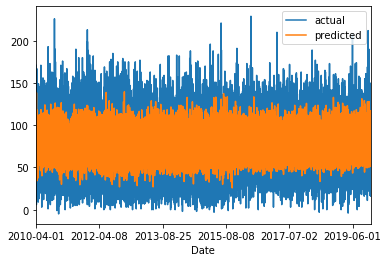

In [38]:
df_all_players_predicted = df_predicted_scores[['Date', 'actual', 'predicted']]
df_all_players_predicted = df_all_players_predicted.set_index('Date')
lines = df_all_players_predicted.plot.line()

,actual,predicted
Date,,
2010-04-04,98,90.152618
2010-05-29,70,63.032778
2010-07-16,68,83.745675
2010-08-01,50,80.164791
2011-04-09,71,75.621649
...,...,...
2019-05-05,26,104.162797
2019-06-22,141,96.699700
2019-08-03,57,108.311979


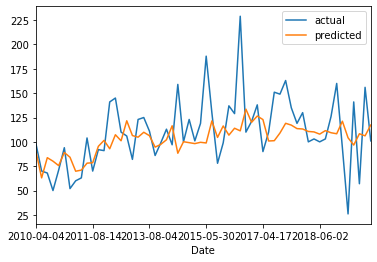

In [39]:
df_player = df_predicted_scores.loc[df_predicted_scores['Player'] == 'Patrick Dangerfield']
df_player = df_player[['Date', 'actual', 'predicted']]
df_player = df_player.set_index('Date')
display(df_player)
lines = df_player.plot.line()

In [40]:
from sklearn.metrics import mean_squared_error 

df_thingy = df_predicted_scores[['Date', 'Player', 'rolling 3 round average', 'actual', 'predicted']]
df_thingy['3rd_diff'] = df_thingy['rolling 3 round average'] - df_thingy['actual']
df_thingy['predict_diff'] = df_thingy['predicted'] - df_thingy['actual']

display(mean_squared_error(df_thingy['rolling 3 round average'], df_thingy['actual']))
display(mean_squared_error(df_thingy['predicted'], df_thingy['actual']))

C:\Users\richardm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\richardm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


762.0784185770851

635.7398761826769